In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [77]:
df = pd.read_csv('input/scores-SECOM.csv')
df = df.dropna()
df['Model_coded'] = df['Model'].map({'RF': 1, 'LR': 2, 'NN':3})
df

,n_cols,outlier_replace_with,imputation_knn_weight,FS_classifier_model,remove_multicoli,balancing_sampling_technique,Model,accuracy,f1,precision,recall,Model_coded
0,223,3s,MICE,nothing,Yes,SMOTE,RF,0.9140,0.3415,0.3500,0.3333,1
1,223,nothing,MICE,nothing,Yes,SMOTE,RF,0.9140,0.3415,0.3500,0.3333,1
2,226,nothing,knn__uniform,nothing,Yes,SMOTE,RF,0.8981,0.3043,0.2800,0.3333,1
4,11,3s,MICE,BoS__shap,Yes,SMOTE,RF,0.8471,0.3514,0.2453,0.6190,1
6,24,3s,knn__distance,RFE__RF,Yes,ADASYN,RF,0.8694,0.3051,0.2368,0.4286,1
...,...,...,...,...,...,...,...,...,...,...,...,...
139,226,nothing,knn__uniform,nothing,Yes,ROSE,RF,0.9331,0.0000,0.0000,0.0000,1
140,223,nothing,MICE,nothing,Yes,ROSE,RF,0.9331,0.0000,0.0000,0.0000,1
141,24,3s,knn__uniform,RFE__RF,Yes,ROSE,NN,0.9331,0.0000,0.0000,0.0000,3
142,240,nothing,knn__uniform,nothing,Yes,SMOTE,NN,0.9331,0.0000,0.0000,0.0000,3


In [73]:
type(df.iloc[0,0])

numpy.int64

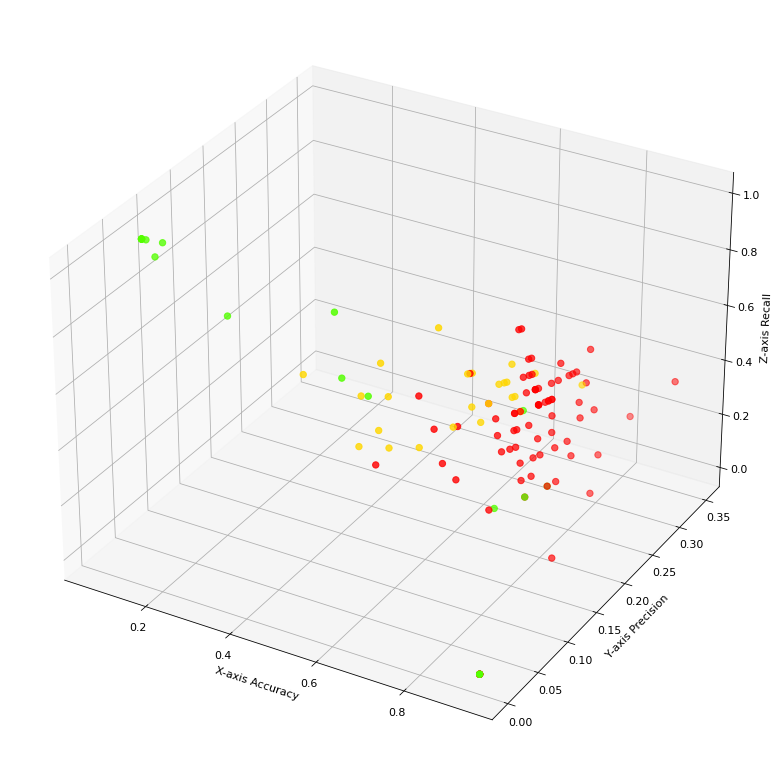

In [108]:
fig = plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 11})
ax = fig.add_subplot(projection='3d')

y,z,x = df.precision, df.recall, df.accuracy
ax.set_xlabel('X-axis Accuracy')
ax.set_ylabel('Y-axis Precision')
ax.set_zlabel('Z-axis Recall')


# ax.plot(x, y, '+', markersize=.2, color='r', zdir='z', zs=-2.)
# ax.plot(x, z, '+', markersize=.2, color='g', zdir='y', zs=2.)
# ax.plot(y, z, '+', markersize=.2, color='b', zdir='x', zs=-2.)


ax.scatter(x,y,z, c = df.Model_coded, cmap='prism', marker='o', s=40)
#green = NN, red=RF, yellow=LR
plt.show()

In [136]:
df = pd.read_csv('input/scores2-SECOM.csv')
df['Model_coded'] = df['Model'].map({'RF': 1, 'LR': 2, 'NN':3})
df

,n_cols,outlier_replace_with,imputation_knn_weight,FS_classifier_model,remove_multicoli,balancing_sampling_technique,Model,combination,accuracy,precision,recall,auc,log_loss_,cohen_kappa_score_,accuracy_train,precision_train,recall_train,auc_train,Model_coded
0,223,3s,MICE,nothing,Yes,SMOTE,RF,3s & MICE & nothing & SMOTE & RF,0.9140,0.3500,0.3333,0.6445,2.9699,0.2955,0.9778,0.9612,0.9957,0.9778,1
1,223,nothing,MICE,nothing,Yes,SMOTE,RF,nothing & MICE & nothing & SMOTE & RF,0.9140,0.3500,0.3333,0.6445,2.9699,0.2955,0.9778,0.9612,0.9957,0.9778,1
2,226,nothing,knn__uniform,nothing,Yes,SMOTE,RF,nothing & knn__uniform & nothing & SMOTE & RF,0.8981,0.2800,0.3333,0.6359,3.5199,0.2498,0.9761,0.9588,0.9949,0.9761,1
3,10,NaN,knn__uniform,BoS__shap,Yes,SMOTEENN,NN,NaN & knn__uniform & BoS__shap & SMOTEENN & NN,0.8631,0.2500,0.5238,0.7056,4.7299,0.2726,0.7167,0.9045,0.5675,0.7432,3
4,11,3s,MICE,BoS__shap,Yes,SMOTE,RF,3s & MICE & BoS__shap & SMOTE & RF,0.8471,0.2453,0.6190,0.7413,5.2799,0.2826,0.8607,0.8465,0.8812,0.8607,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,5,3s,MICE,BoS__gini,Yes,ROSE,LR,3s & MICE & BoS__gini & Yes & ROSE & LR,0.5892,0.0970,0.6190,0.6030,14.1898,0.0589,0.5363,0.5406,0.4838,0.5363,2
144,11,NaN,MICE,BoS__shap,Yes,SMOTEENN,RF,NaN & MICE & BoS__shap & Yes & SMOTEENN & RF,0.7038,0.1250,0.5714,0.6424,10.2299,0.1071,0.8908,0.8611,0.9642,0.8787,1
145,11,NaN,MICE,BoS__shap,Yes,ADASYN,RF,NaN & MICE & BoS__shap & Yes & ADASYN & RF,0.7771,0.1343,0.4286,0.6153,7.6999,0.1144,0.8735,0.8306,0.9426,0.8726,1
146,11,NaN,MICE,BoS__shap,Yes,SMOTE,RF,NaN & MICE & BoS__shap & Yes & SMOTE & RF,0.8025,0.1404,0.3810,0.6069,6.8199,0.1190,0.8423,0.8631,0.8137,0.8423,1


<AxesSubplot:xlabel='accuracy', ylabel='accuracy_train'>

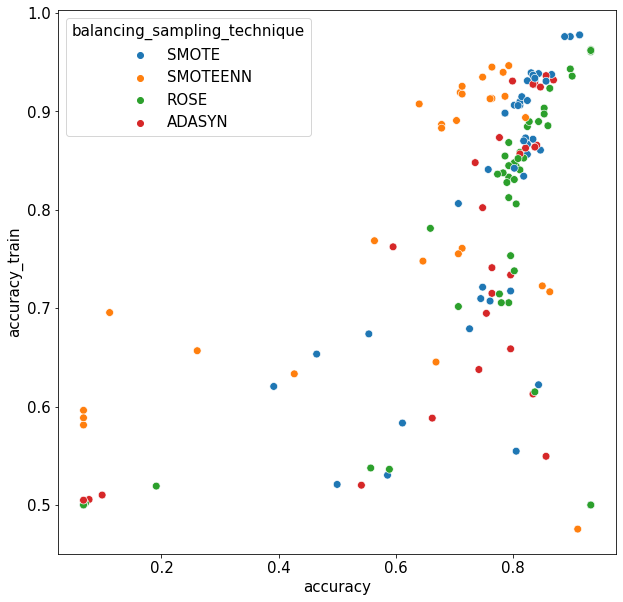

In [137]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})
sns.scatterplot(data=df, x="accuracy", y="accuracy_train", hue="balancing_sampling_technique", s=60)

<AxesSubplot:xlabel='accuracy', ylabel='accuracy_train'>

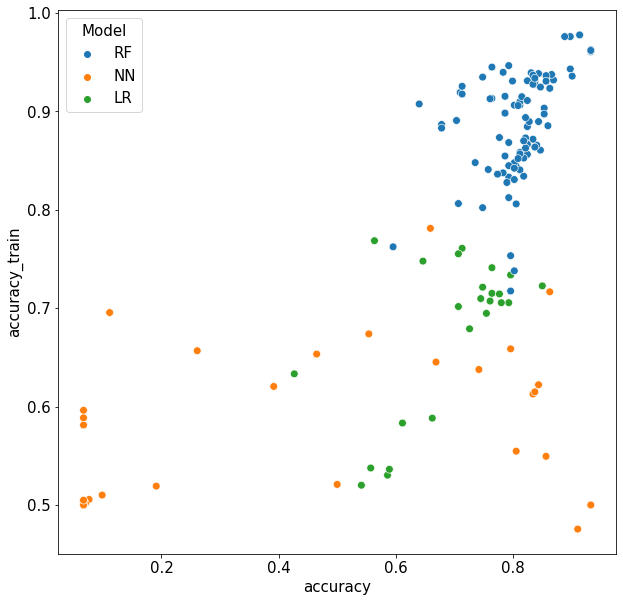

In [138]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})
sns.scatterplot(data=df, x="accuracy", y="accuracy_train", hue="Model", s=60)

<AxesSubplot:xlabel='recall', ylabel='recall_train'>

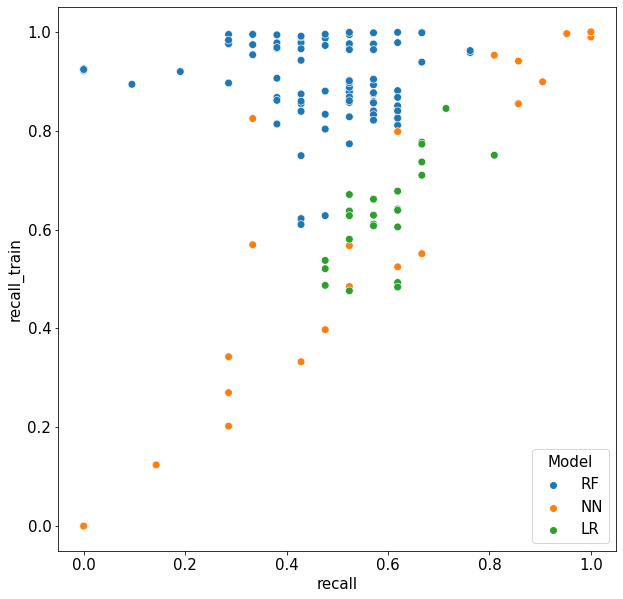

In [140]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})
sns.scatterplot(data=df, x="recall", y="recall_train", hue="Model", s=60)

<AxesSubplot:xlabel='precision', ylabel='precision_train'>

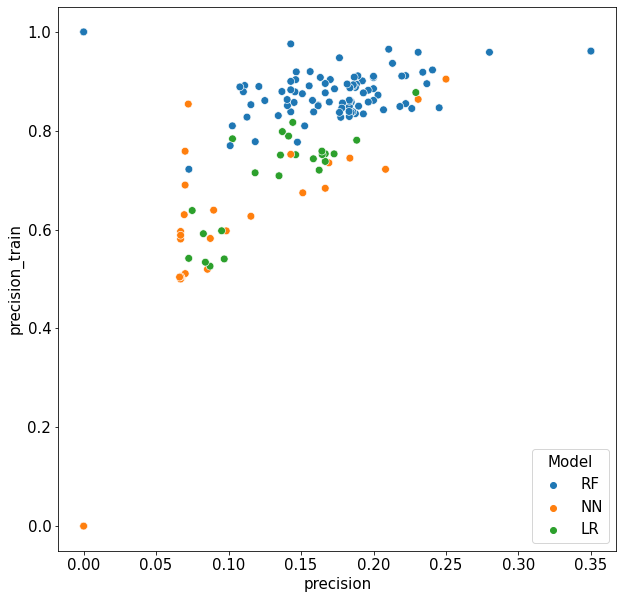

In [142]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})
sns.scatterplot(data=df, x="precision", y="precision_train", hue="Model", s=60)

In [134]:
df.describe()

,n_cols,accuracy,precision,recall,auc,log_loss_,cohen_kappa_score_,accuracy_train,precision_train,recall_train,auc_train,Model_coded
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.308333,0.726217,0.148556,0.517851,0.629506,9.456195,0.135226,0.795572,0.785235,0.816486,0.790470,1.533333
std,64.547526,0.215197,0.065184,0.221600,0.072795,7.432966,0.081768,0.147005,0.180616,0.217949,0.152083,0.766234
min,4.000000,0.066900,0.000000,0.000000,0.495000,2.309900,-0.001400,0.500000,0.000000,0.000000,0.500000,1.000000
25%,11.000000,0.713400,0.102675,0.428600,0.577700,5.692400,0.064200,0.704625,0.737200,0.730075,0.704625,1.000000
50%,15.000000,0.796200,0.161800,0.523800,0.644500,7.039900,0.148300,0.853650,0.846200,0.886750,0.853650,1.000000
75%,27.000000,0.835200,0.186900,0.619000,0.685900,9.899900,0.198000,0.915100,0.891925,0.974400,0.910125,2.000000
max,240.000000,0.933100,0.350000,1.000000,0.763200,32.229600,0.295500,0.977800,1.000000,1.000000,0.977800,3.000000


<AxesSubplot:xlabel='recall', ylabel='precision'>

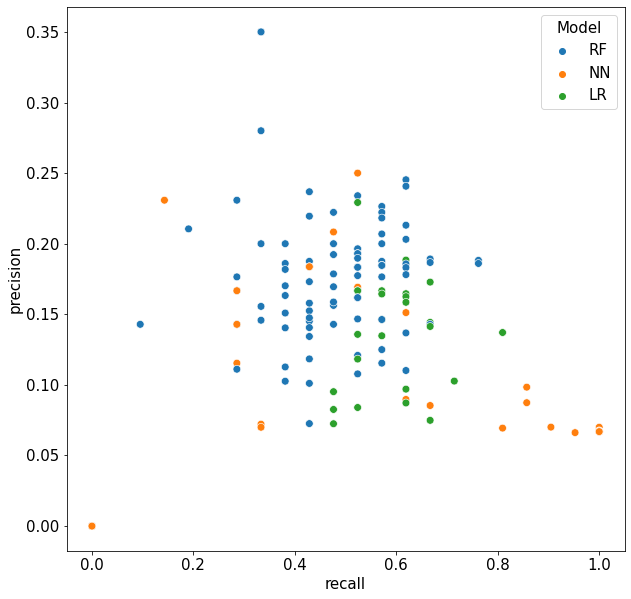

In [143]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})
sns.scatterplot(data=df, x="recall", y="precision", hue="Model", s=60)

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})
sns.scatterplot(data=df, x="recall", y="precision", hue="Model", s=60)